<img src="https://cdn.siberian.dev/siberian.png" alt="Siberian Logo">

### Bernoulli Naive Bayes Classifier With Scale

This code template is facilitates to solve the problem of classification problem using Bernoulli Naive Bayes Algorithm using Scale technique.

### Required Packages

In [1]:
!pip install imblearn

In [2]:
import warnings 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as se 
from imblearn.over_sampling import RandomOverSampler
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import BernoulliNB 
from sklearn.preprocessing import LabelEncoder,scale
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report,plot_confusion_matrix
warnings.filterwarnings('ignore')

### Initialization

Filepath of CSV file

In [3]:
#filepath
file_path= ""

List of features which are  required for model training .

In [4]:
#x_values
features=[]

Target feature for prediction.

In [5]:
#y_value
target=''

### Data Fetching

Pandas is an open-source, BSD-licensed library providing high-performance, easy-to-use data manipulation and data analysis tools.

We will use panda's library to read the CSV file using its storage path.And we use the head function to display the initial row or entry.

In [6]:
df=pd.read_csv(file_path)
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### Feature Selections

It is the process of reducing the number of input variables when developing a predictive model. Used to reduce the number of input variables to both reduce the computational cost of modelling and, in some cases, to improve the performance of the model.

We will assign all the required input features to X and target/outcome to Y.

In [7]:
X = df[features]
Y = df[target]

### Data Preprocessing

Since the majority of the machine learning models in the Sklearn library doesn't handle string category data and Null value, we have to explicitly remove or replace null values. The below snippet have functions, which removes the null value if any exists. And convert the string classes data in the datasets by encoding them to integer classes.


In [8]:
def NullClearner(df):
    if(isinstance(df, pd.Series) and (df.dtype in ["float64","int64"])):
        df.fillna(df.mean(),inplace=True)
        return df
    elif(isinstance(df, pd.Series)):
        df.fillna(df.mode()[0],inplace=True)
        return df
    else:return df
def EncodeX(df):
    return pd.get_dummies(df)
def EncodeY(df):
    if len(df.unique())<=2:
        return df
    else:
        un_EncodedT=np.sort(pd.unique(df), axis=-1, kind='mergesort')
        df=LabelEncoder().fit_transform(df)
        EncodedT=[xi for xi in range(len(un_EncodedT))]
        print("Encoded Target: {} to {}".format(un_EncodedT,EncodedT))
        return df

In [9]:
x=X.columns.to_list()
for i in x:
    X[i]=NullClearner(X[i])  
X=EncodeX(X)
Y=EncodeY(NullClearner(Y))
X.head()

,Age,EstimatedSalary,Gender_Female,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,1,0
3,27,57000,1,0
4,19,76000,0,1


#### Correlation Map

In order to check the correlation between the features, we will plot a correlation matrix. It is effective in summarizing a large amount of data where the goal is to see patterns.

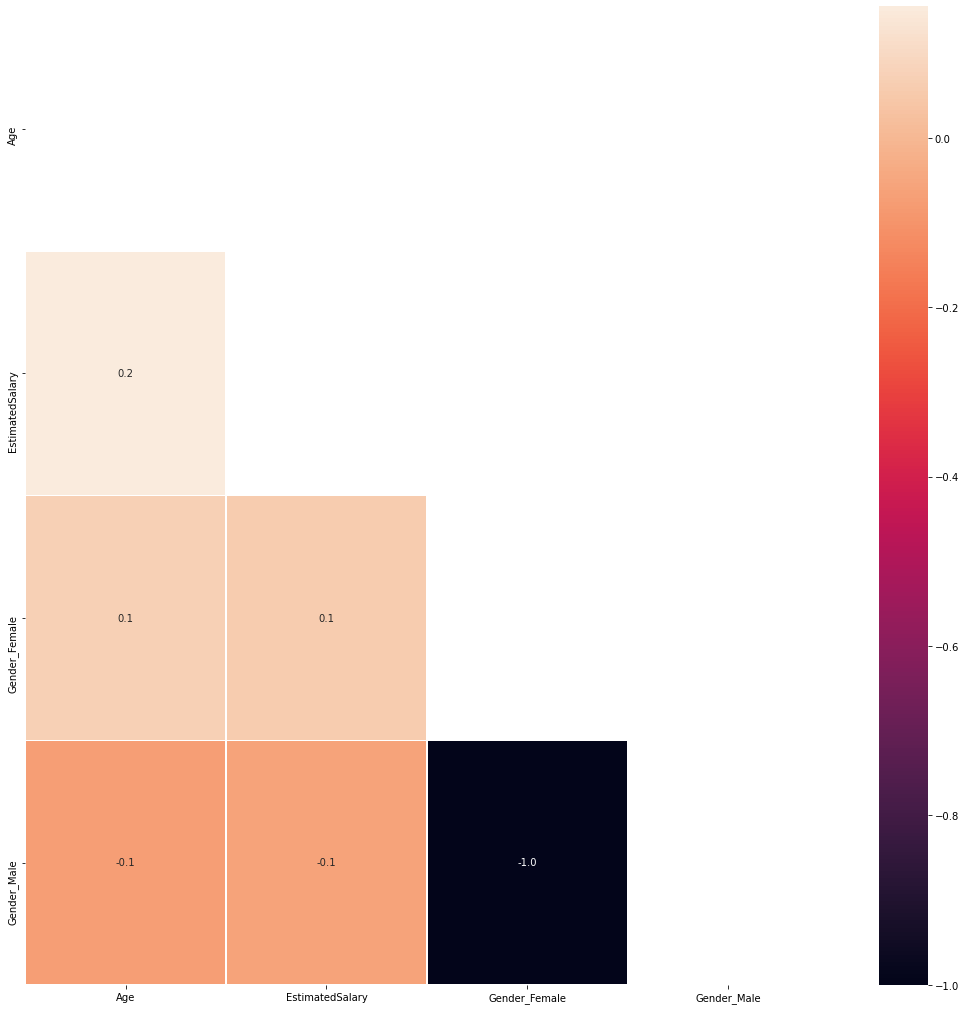

In [10]:
f,ax = plt.subplots(figsize=(18, 18))
matrix = np.triu(X.corr())
se.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, mask=matrix)
plt.show()

#### Distribution of Target Variable

<AxesSubplot:xlabel='Purchased', ylabel='count'>

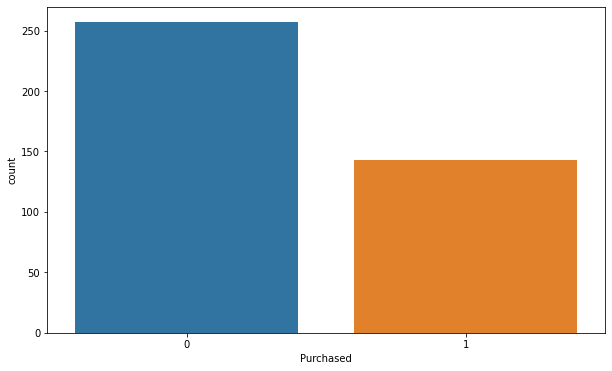

In [11]:
plt.figure(figsize = (10,6))
se.countplot(Y)

### Data Splitting

The train-test split is a procedure for evaluating the performance of an algorithm. The procedure involves taking a dataset and dividing it into two subsets. The first subset is utilized to fit/train the model. The second subset is used for prediction. The main motive is to estimate the performance of the model on new data.

In [12]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=123)

#### Handling Target Imbalance

The challenge of working with imbalanced datasets is that most machine learning techniques will ignore, and in turn have poor performance on, the minority class, although typically it is performance on the minority class that is most important.

One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class.We will perform overspampling using imblearn library. 

In [13]:
x_train,y_train = RandomOverSampler(random_state=123).fit_resample(x_train, y_train)

#### Data Rescaling

sklearn.preprocessing.scale(X, *, axis=0, with_mean=True, with_std=True, copy=True)

Standardize a dataset along any axis. Center to the mean and component wise scale to unit variance.

more details at  [scikit-learn.org](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html)

In [14]:
x_train=scale(x_train) 
x_test=scale(x_test)

### Model

<code>Bernoulli Naive Bayes Classifier</code> is used for discrete data and it works on Bernoulli distribution. The main feature of Bernoulli Naive Bayes is that it accepts features only as binary values like true or false, yes or no, success or failure, 0 or 1 and so on. So when the feature values are **<code>binary</code>** we know that we have to use Bernoulli Naive Bayes classifier.

#### Model Tuning Parameters

    1. alpha : float, default=1.0
> Additive (Laplace/Lidstone) smoothing parameter (0 for no smoothing).

    2. binarize : float or None, default=0.0
> Threshold for binarizing (mapping to booleans) of sample features. If None, input is presumed to already consist of binary vectors.

    3. fit_prior : bool, default=True
> Whether to learn class prior probabilities or not. If false, a uniform prior will be used.

    4. class_prior : array-like of shape (n_classes,), default=None
> Prior probabilities of the classes. If specified the priors are not adjusted according to the data.

In [15]:
# BernoulliNB.
model = BernoulliNB()
model.fit(x_train, y_train)

BernoulliNB()

#### Model Accuracy
score() method return the mean accuracy on the given test data and labels.

In multi-label classification, this is the subset accuracy which is a harsh metric since you require for each sample that each label set be correctly predicted.

In [16]:
print("Accuracy score {:.2f} %\n".format(model.score(x_test,y_test)*100))

Accuracy score 70.00 %



#### Confusion Matrix

A confusion matrix is utilized to understand the performance of the classification model or algorithm in machine learning for a given test set where results are known.

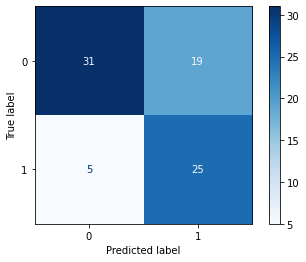

In [17]:
plot_confusion_matrix(model,x_test,y_test,cmap=plt.cm.Blues)

#### Classification Report
A Classification report is used to measure the quality of predictions from a classification algorithm. How many predictions are True, how many are False.

* **where**:
    - Precision:- Accuracy of positive predictions.
    - Recall:- Fraction of positives that were correctly identified.
    - f1-score:-  percent of positive predictions were correct
    - support:- Support is the number of actual occurrences of the class in the specified dataset.

In [18]:
print(classification_report(y_test,model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.86      0.62      0.72        50
           1       0.57      0.83      0.68        30

    accuracy                           0.70        80
   macro avg       0.71      0.73      0.70        80
weighted avg       0.75      0.70      0.70        80



#### Creator: Snehaan Bhawal , Github: [Profile](https://github.com/Sbhawal)